# Big Data and Data Analytics - Huston Housing

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import math

##  1: Dataset Import and Preparation

### 1.1
- Load the dataset `Housing.csv` into a pandas `DataFrame` named `df_housing`

In [174]:
# Import data from the csv file

df_housing = pd.read_csv('Housing.csv')
print(df_housing.isna().any())

# Seems there is no Null value, but just in case:
df_movie = df_housing.dropna()
df_movie.head()

ID         False
CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
LSTAT      False
MEDV       False
dtype: bool


,ID,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## 2. Regression

### 2.1
- Perform a multiple linear regression that regresses `MEDV` on `CRIM` (per capita crime rate by town), `RM` (average number of rooms per dwelling), `NOX` (nitric oxides concentration; parts per 10 million), `DIS` (weighted distances to five Boston employment centres), and `AGE` (proportion of owner- occupied units built prior to 1940). Save the model as `res_1`.
- `print` the results of the regression `res_1` to the console (including a regression table and reporting of F-values).

In [175]:
# Fit the model using smf.ols

res_1 = smf.ols(formula= 'MEDV ~ CRIM + RM + NOX + DIS + AGE', data= df_housing).fit()
print(res_1.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     145.3
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           5.02e-95
Time:                        22:45:48   Log-Likelihood:                -1613.2
No. Observations:                 506   AIC:                             3238.
Df Residuals:                     500   BIC:                             3264.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.2273      4.015     -1.551      0.1

#### <span style="color:#E2C382;">*Report:*</span>
Adjusted R-squared reflects the fit of the model. The results indicate a 58.8% of changes in MEDV can be explained by the independent variables. Since the P-value following independent variables is all < 0.05, the relationships are considered statistically significant. At last, the formula might be written as: MEDV = -6.2273 - 0.2081 x CRIM + 7.7353 x RM - 18.0509 x NOX - 1.1910 x DIS - 0.0666 x AGE. This makes sense by showing that the value is positively linked to room numbers (RM), but negatively linked to crime rate (CRIM), pollutant levels (NOX), distance from employment centres (DIS), as well as the proportion of old dwelling (AGE).

### 2.2
- Add a new categorical column to `df_housing` called `NOXCAT`. This column categorizes the suburbs into towns with `LOW`, `MEDIUM`, and `HIGH` nitric oxides concentration (based on the variable `NOX`). The categorization should be based on quantiles of `NOX` as follows:
    - LOW (NOX <= 30% quantile)
    - MEDIUM (> 30% quantile; <= 70% quantile)
    - HIGH (> 70% quantile).
- Create a boxplot that shows `MEDV` for the different values of `NOXCAT` (`LOW`, `MEDIUM`, `HIGH`). Use appropriate titels for the plot and its axes. 

[0.472 0.605]


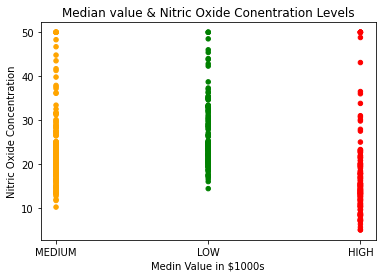

In [176]:
# Calculate Quartiles of 30% and 70% from series NOX

quartiles = np.quantile(df_housing['NOX'],[0.3, 0.7])
print(quartiles)

# Create a new categorical column NOXCAT
df_housing.loc[
            (df_housing['NOX'] <= quartiles[0])
            ,'NOXCAT'
            ] = 'LOW'
df_housing.loc[
            ((df_housing['NOX'] >= quartiles[0])
            & (df_housing['NOX'] <= quartiles[1]))
            ,'NOXCAT'
            ] = 'MEDIUM'
df_housing.loc[
            (df_housing['NOX'] > quartiles[1])
            ,'NOXCAT'
            ] = 'HIGH'

# Creat a scatter plot after checking the new df with .head() and conditions to verify the new column             

colors = {'LOW':'green', 'MEDIUM':'orange', 'HIGH':'red'}
plt.scatter(df_housing['NOXCAT'], df_housing['MEDV'], c=df_housing['NOXCAT'].map(colors), s = 20)

# Define the graph title, axis names and legend, add grid
plt.title('Median value & Nitric Oxide Conentration Levels')
plt.xlabel('Medin Value in $1000s')
plt.ylabel('Nitric Oxide Concentration')
plt.show()

### 2.3
The newly created column `NOXCAT` in `df_housing` is a categorical column with three possible values (`LOW`, `MEDIUM`, and `HIGH`). 
- Create a set of dummy variables (for different values of `NOXCAT`).
- Regress `MEDV` on the different `NOX` categories using the dummy variables. Choose the dummy variable coding in your regression such that the intercept reflects the `MEDV` value of suburbs in the `MEDIUM` category. Save the regression result as `res_2` and `print` the regression result to the console.
- Report the regression results from `res_2` in your own words according to APA stype and interpret the coefficients.

In [177]:
# Create dummies on NOXCAT with names dmy_xxx

df_housing_dmf = pd.get_dummies(df_housing, columns=['NOXCAT'], prefix="NOXdmy")

# Regress on y = DEDV with X = three different nox levels
res_2 = smf.ols(formula= 'MEDV ~ NOXdmy_HIGH + NOXdmy_MEDIUM + NOXdmy_LOW', data= df_housing_dmf).fit()
print(res_2.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.157
Method:                 Least Squares   F-statistic:                     48.05
Date:                Sun, 09 Oct 2022   Prob (F-statistic):           7.98e-20
Time:                        22:45:49   Log-Likelihood:                -1796.0
No. Observations:                 506   AIC:                             3598.
Df Residuals:                     503   BIC:                             3611.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        16.8262      0.284     59.170

#### <span style="color:#E2C382;">*Report:*</span>
Adjusted R-squared indicates limited changes in MEDV can be explained by the independent variables. Since the P-value following high nitric oxide level is above 0.05, only MEDV's relationship with Medium and Low levels is considered statistically significant. The formula might be written as: MEDV = 16.8262 + 6.5434 x NOXdmy_MEDIUM + 9.8208 x NOXdmy_LOW. This makes sense as the value will increase with lower nitric oxide (pollutant) levels. 

## 3. Classification

### 3.1
- Create a new numerical column called `MEDVBIN` in `df_housing`. The column takes on the value `1` if `MEDV` is greater than the median of `MEDV`. Otherwise, it takes on the value `0`.
- Perform a logistic regression that regresses the newly created column `MEDVBIN` on `CRIM`, `RM`, `NOX`, `DIS` and `AGE` in order to predict the probability that a house has a high `MEDV`. Save the regression results as `res_3` and `print` the results to the console.
- Report the results of the logistic regression `res_3` in APA style, including reporting of AIC, and then interpret the coefficients in your own words.

In [178]:
# Calculate the median value of MEDV

MEDV_median = df_housing ['MEDV'].median()
MEDV_median

# Create a new categorical column MEDVBIN
df_housing.loc[
            (df_housing['MEDV'] <= MEDV_median)
            ,'MEDVBIN'
            ] = '0'
df_housing.loc[
            (df_housing['MEDV'] > MEDV_median)
            ,'MEDVBIN'
            ] = '1'

# Convert the new series to numeric
df_housing['MEDVBIN'] = df_housing['MEDVBIN'].astype(int)


# Fit to the logit model
 
res_3 = smf.logit(formula= 'MEDVBIN ~ CRIM + RM + NOX + DIS + AGE', data= df_housing).fit()
print(res_3.summary())          

Optimization terminated successfully.
         Current function value: 0.394887
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                MEDVBIN   No. Observations:                  506
Model:                          Logit   Df Residuals:                      500
Method:                           MLE   Df Model:                            5
Date:                Sun, 09 Oct 2022   Pseudo R-squ.:                  0.4302
Time:                        22:45:49   Log-Likelihood:                -199.81
converged:                       True   LL-Null:                       -350.70
Covariance Type:            nonrobust   LLR p-value:                 4.174e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.1635      2.442     -4.162      0.000     -14.950      -5.378
CRIM          -0.1627      0.

#### <span style="color:#E2C382;">*Answer:*</span>
 Since the P-values are all smaller than 0.05 except NOX, we found that changes in CRIM, RM, DIS and AGE have a significant relationship with the probability of prices going above the MEDVBIN. log(p/1-p) [odd ration of higher than median] = -10.1635 -0.1627 x CRIM + 2.7538 x RM - 0.4394 x DIS -0.0457 x AGE. In other words, for one unit increase in the crime rate (CRIM), distance from employment centres (DIS), pollution (NOX) and % of aged dwellings (AGE), we can expect less probability of MEDV higher than its overall median value. Except for RM, an increase in room numbers will increase the probability of having a higher MEDV (MEDVBIN = 1).


### 3.2
- Continue from the results `res_3` from the previous exercise by considering the first example listed in `df_housing` (index 0).
- Use the model coefficient estimates and the corresponding values for the first example to calculate its logit and odds. `print` the logits and odds to the console.
- Compare to the actual `MEDVBIN` of this house and describe in your own words how well the model performed in this case.


In [179]:
# Define a function that converts logit to probability

def logit_to_prob (index_number):
    logit = -10.1635 - 0.1627*df_housing.loc[index_number, 'CRIM'] + 2.7538*df_housing.loc[index_number, 'RM'] - 0.4394*df_housing.loc[index_number, 'DIS'] -0.0457*df_housing.loc[index_number, 'AGE']
    odds = math.exp(logit)
    prob = odds/(1+odds)
    return(prob)

logit_to_prob(0)

0.9594926313421108

#### <span style="color:#E2C382;">*Report:*</span>
Result from the above defined function indicates that there is near 96% probability that the indexed probability will have a high median value (MEDVBIN = 1). As can be verified, the row does have a 1 in the MEDVBIN cell. The model performs well for this instance. 

### 3.3
Examine not only how the logistic regression model `res_3` did for the first example, but for the entire dataset.
- Use `res_3` to predict the probabilities of `MEDVBIN` being `1`, and save them as a new column `MEDVBIN_PROB` in `df_housing`.
- Generate the actual model predictions as a new column `MEDVBIN_PRED` in `df_housing` by setting them to `1` if the predicted probability `MEDVBIN_PROB` is greater than `0.5`, and to `0` otherwise. 
- Create a confusion matrix `conf_mat` for the results generated by `res_3` to tabulate the predictions `MEDVBIN_PRED` and actual values `MEDVBIN`. `print` `conf_mat` to the console.
- Based on `conf_mat`, calculate sensitivity, specificity, and accuracy. `print` these values to the console as a grammatically correct sentence.
- Interpret sensitivity, specificity, and accuracy.

The confusion matrix's specificity is 0.8515625, sensitivity is 0.82, with an accuracy of 0.8359683794466403


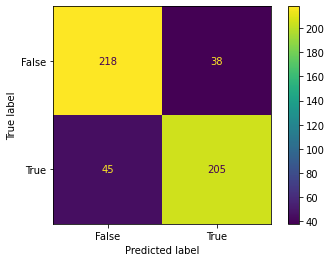

In [180]:
# Frist define the dependant and independent variables

Xtest = df_housing[['CRIM', 'RM', 'NOX', 'DIS', 'AGE']]
ytest = df_housing['MEDVBIN']
  
# Performing predictions on the test datdaset and added to the orginal df
ypre = res_3.predict(Xtest)
df_housing['MEDVBIN_PROB'] = list(ypre)

# Create a new categorical column MEDVBIN_PRED based on MEDVBIN_PROB
df_housing.loc[
            (df_housing['MEDVBIN_PROB'] <= 0.5)
            ,'MEDVBIN_PRED'
            ] = '0'
df_housing.loc[
            (df_housing['MEDVBIN_PROB'] > 0.5)
            ,'MEDVBIN_PRED'
            ] = '1'

df_housing['MEDVBIN_PRED'] = df_housing['MEDVBIN_PRED'].astype(int)
conf_mat = confusion_matrix(df_housing['MEDVBIN'],df_housing['MEDVBIN_PRED'])
conf_mat_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=[False, True])
conf_mat_display.plot()

# Calculate sensitivity, specificity and accuracy from conf_mat
total_conf = sum(sum(conf_mat))

accuracy_conf = (conf_mat[0,0] + conf_mat [1,1])/total_conf
specificity_conf = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])
sensitivity_conf = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

print(f"The confusion matrix's specificity is {specificity_conf}, sensitivity is {sensitivity_conf}, with an accuracy of {accuracy_conf}")

#### <span style="color:#E2C382;">*Report:*</span>

Accuracy means that overall, how often is the classifier correct in the predictions. Here, we see that near 83.6% percent are correct predictions, either TP or TN. Sensitivity means the true positive rate, here actually measures how often it predicts 1 when the result is actually 1 (above median value). We see that near 82% of the predictions are true 1. Lastly, Specificity here means the other way around, we see that near 85% true negatie rate, which means the model predicts 0 when it is actually 0. Overall, the model has near 83.6% accuracy in predicting whether the town will have a higher median value of owner-occupied homes.